In [4]:
import numpy as np
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
num_labels = len(np.unique(y_train))
print("total de labels:t{}".format(num_labels))
print("labels:ttt{0}".format(np.unique(y_train)))

total de labels:t10
labels:ttt[0 1 2 3 4 5 6 7 8 9]


In [6]:
#converter em one-hot
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
image_size = x_train.shape[1] 
input_size = image_size * image_size

print("x_train:t{}".format(x_train.shape))
print("x_test:tt{}n".format(x_test.shape))

x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255

x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

print("x_train:t{}".format(x_train.shape))
print("x_test:tt{}".format(x_test.shape))

x_train:t(60000, 28, 28)
x_test:tt(10000, 28, 28)n
x_train:t(60000, 784)
x_test:tt(10000, 784)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

# Parameters
batch_size = 128 # It is the sample size of inputs to be processed at each training stage. 
hidden_units = 256
dropout = 0.45

# Nossa  MLP com ReLU e Dropout 
model = Sequential()

model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(num_labels))

c:\Users\ravi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.add(Activation('softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7711 - loss: 0.7168
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9406 - loss: 0.2037
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9523 - loss: 0.1574
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9609 - loss: 0.1286
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9644 - loss: 0.1176
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9695 - loss: 0.0997
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9725 - loss: 0.0918
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9731 - loss: 0.0869
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9756 - loss: 0.0791
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9767 - loss: 0.0740
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9768 - loss: 0.0724
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━

In [12]:
"""_,acc = model.evaluate(x_test, y_test,batch_size=batch_size,verbose=0)
print("Accuracy: %.1f%% n" % (100.0 * acc))"""

loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {acc * 100:.1f}%")


Test Loss: 0.0664
Test Accuracy: 98.4%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Predicted Class: 2


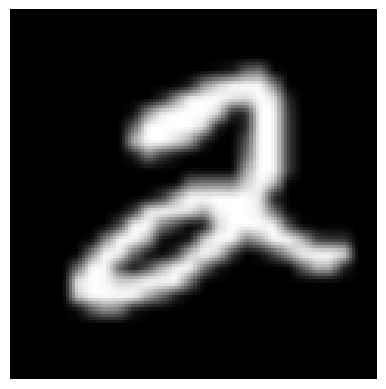

In [13]:
import cv2
import matplotlib.pyplot as plt

# Load an external image and make a prediction
image_path = r"C:\Users\ravi\Desktop\ME\RAVI\2pic.png"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Preprocess the image (resize, normalize, reshape)
img_resized = cv2.resize(img, (28, 28))
img_normalized = img_resized / 255.0
img_reshaped = img_normalized.reshape(1, input_size)  # Reshape to (1, 784)

# Make a prediction using the model
prediction = model.predict(img_reshaped)
predicted_class = np.argmax(prediction, axis=1)
print(f'Predicted Class: {predicted_class[0]}')

# Display the original image
plt.imshow(img, cmap='gray')
plt.axis('off')  # Turn off axis labels
plt.show()
